In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
train = pd.read_csv('TRAIN.csv')
train.head()

C:\Users\Akshay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [56]:
train.shape

(712046, 9)

In [57]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [58]:
train.duplicated().sum()

0

In [59]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,712046.000000,712046.000000,712046.000000,712046.000000,712046.000000,712046.000000,712046.000000
mean,558.427662,3.999787,5872.082608,637.975274,0.828574,0.380600,0.172167
std,321.965298,1.996273,3918.569033,468.446468,0.376881,0.485535,0.377526
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3795.000000,410.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5848.000000,614.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7991.000000,843.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5494.000000,1.000000,1.000000,1.000000


In [60]:
test = pd.read_csv('TEST.csv')
test.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,767,1,2013-04-01,0,0,b,1
1,1111,6,2013-03-16,1,0,0,0
2,45,4,2013-08-01,1,1,0,1
3,500,4,2013-05-23,1,0,0,1
4,82,2,2013-08-06,1,0,0,1


In [61]:
test.shape

(305163, 7)

In [62]:
test.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712046 entries, 0 to 712045
Data columns (total 9 columns):
Store            712046 non-null int64
DayOfWeek        712046 non-null int64
Date             712046 non-null object
Sales            712046 non-null int64
Customers        712046 non-null int64
Open             712046 non-null int64
Promo            712046 non-null int64
StateHoliday     712046 non-null object
SchoolHoliday    712046 non-null int64
dtypes: int64(7), object(2)
memory usage: 48.9+ MB


In [64]:
train['StateHoliday'].value_counts()

0    557868
0    131072
a     14546
b      4460
c      4100
Name: StateHoliday, dtype: int64

In [73]:
store = pd.read_csv('store.csv')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [65]:
train = train.drop('Date', axis = 1)
test = test.drop('Date', axis = 1)

In [66]:
train['StateHoliday'] = train['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 1, 'c' : 1})
test['StateHoliday'] = test['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 1, 'c' : 1})

In [67]:
train['StateHoliday'].value_counts()

0    688940
1     23106
Name: StateHoliday, dtype: int64

In [68]:
x = train.drop('Sales', axis = 1)
y = train['Sales']

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [70]:
from sklearn.metrics import mean_squared_error

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

684.292769896274


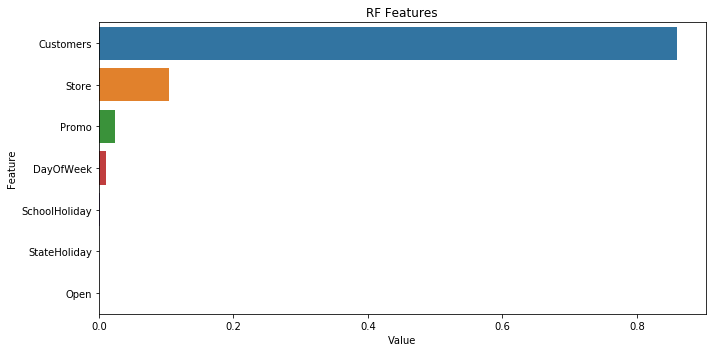

In [38]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RF Features')
plt.tight_layout()
plt.show()

In [71]:
x_train = train.drop(['Sales', 'Customers'], axis = 1)
y_train = train['Sales']
x_test = test
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)

In [72]:
solution = pd.DataFrame({'Sales' : y_pred})
solution.to_csv('Solution.csv')